# Explorative Data Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *
import plotly.graph_objects as go
import numpy as np
from zipfile import ZipFile
from helpers.paths import Paths
from helpers.is_interactive import is_interactive
from joblib import dump, load
import __main__ as main

### Run dependency notebooks

In [2]:
if is_interactive(main):
    %run 01_0_data_wrangling.ipynb -p

Running previous notebooks...


## Data Import

In [3]:
source_data = load(Paths.REGRESSOR_DATA_WRANGLING_DATA)
df = source_data['dataset']
df.head()

,Living space,Plot area,price_cleaned,Floor,Latitude,Longitude,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,...,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa,NoisePollutionRailway,NoisePollutionRoad,PopulationDensity,RiversAndLakes,WorkplaceDensity,ForestDensity
0,100.0,1282.323307,1150000.0,4.00,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.076399,0.223039,0.031951,0.060414,0.296178
1,156.0,222.000000,1420000.0,2.75,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,0.0,1.0,0.0,0.0,0.076399,0.223039,0.031951,0.060414,0.296178
2,93.0,1198.982216,720000.0,2.00,47.397416,8.043150,5000.0,0.909587,11.354420,32.197891,...,0.0,0.0,0.0,0.0,0.0,0.337930,0.451622,0.114168,0.167442,0.087050
3,154.0,370.000000,1430000.0,0.00,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.076399,0.223039,0.031951,0.060414,0.296178
4,142.0,462.537377,995000.0,0.00,47.404870,8.052781,5022.0,1.460245,33.137090,49.705635,...,0.0,0.0,0.0,0.0,0.0,0.167450,0.177506,0.114288,0.046822,0.252992


## Data Exploration

In [4]:
#from dummies to one column
types = [col for col in df.columns if 'type' in col] # get all type columns
df['type'] = df[types].idxmax(axis=1) # get the type with the highest value
df['type'] = df['type'].str.replace('type_', '') # remove the type_ prefix
df['type'] = df['type'].str.replace('unified_', '') # remove the unified_ prefix
df

,Living space,Plot area,price_cleaned,Floor,Latitude,Longitude,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,...,type_unified_studio,type_unified_terrace-house,type_unified_villa,NoisePollutionRailway,NoisePollutionRoad,PopulationDensity,RiversAndLakes,WorkplaceDensity,ForestDensity,type
0,100.0,1282.323307,1150000.0,4.000000,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,0.0,0.0,0.000000,0.076399,0.223039,0.031951,0.060414,0.296178,penthouse
1,156.0,222.000000,1420000.0,2.750000,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,1.0,0.0,0.000000,0.076399,0.223039,0.031951,0.060414,0.296178,terrace-house
2,93.0,1198.982216,720000.0,2.000000,47.397416,8.043150,5000.0,0.909587,11.354420,32.197891,...,0.0,0.0,0.0,0.000000,0.337930,0.451622,0.114168,0.167442,0.087050,penthouse
3,154.0,370.000000,1430000.0,0.000000,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,0.0,0.0,0.000000,0.076399,0.223039,0.031951,0.060414,0.296178,detached-house
4,142.0,462.537377,995000.0,0.000000,47.404870,8.052781,5022.0,1.460245,33.137090,49.705635,...,0.0,0.0,0.0,0.000000,0.167450,0.177506,0.114288,0.046822,0.252992,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,102.0,140.000000,475000.0,0.000000,47.158311,9.468139,9470.0,1.375319,37.178683,29.028213,...,0.0,0.0,0.0,0.000000,0.324880,0.174797,0.000000,0.054621,0.326293,detached-house
22477,250.0,575.342751,1490000.0,0.491208,47.467888,9.052650,9500.0,1.067011,57.602820,30.599295,...,0.0,0.0,0.0,0.000000,0.394630,0.415555,0.004666,0.268897,0.000000,stepped-apartment
22478,240.0,455.000000,1450000.0,0.000000,47.463605,9.038485,9500.0,0.230859,57.602820,30.599295,...,0.0,0.0,0.0,0.054650,0.289442,0.386169,0.000000,0.363505,0.000000,detached-house
22479,175.0,677.771516,1290000.0,0.598259,47.526024,8.926627,9548.0,0.357339,57.068742,26.718547,...,0.0,0.0,0.0,0.000000,0.257977,0.163638,0.016037,0.074210,0.200186,stepped-apartment


In [5]:
df.describe()

,Living space,Plot area,price_cleaned,Floor,Latitude,Longitude,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,...,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa,NoisePollutionRailway,NoisePollutionRoad,PopulationDensity,RiversAndLakes,WorkplaceDensity,ForestDensity
count,21400.000000,21400.000000,2.140000e+04,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000,...,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000,21400.000000
mean,169.479556,944.434652,1.302614e+06,1.027263,46.627695,7.560516,3648.269206,1.920485,34.795546,34.096314,...,0.002664,0.004439,0.023178,0.054346,0.011839,0.262212,0.255434,0.015384,0.129039,0.130333
std,213.587705,3940.270232,1.705569e+06,1.378290,0.491680,0.906462,2452.882269,2.329100,18.796998,18.009849,...,0.051542,0.066481,0.150471,0.226704,0.029324,0.122996,0.168056,0.041124,0.157699,0.173505
min,0.000000,0.000000,1.348000e+04,-4.000000,45.826553,5.971354,1000.000000,0.008166,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001192,0.000000,0.000000,0.000000
25%,97.000000,228.080738,5.750000e+05,0.000000,46.222350,6.925445,1800.000000,0.456533,20.689655,21.428571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.174832,0.124198,0.000000,0.041231,0.010596
50%,130.000000,610.000000,8.600000e+05,0.500000,46.491894,7.342425,2400.000000,1.067011,33.689840,32.539416,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.263331,0.222467,0.000000,0.073696,0.051312
75%,181.011513,1157.000000,1.415000e+06,2.000000,47.040813,8.253629,5707.000000,2.726473,47.847478,45.563025,...,0.000000,0.000000,0.000000,0.000000,0.007178,0.342780,0.357900,0.010275,0.134000,0.182549
max,8000.000000,350917.000000,4.900000e+07,18.000000,47.791953,10.396715,9658.000000,26.482660,87.786260,87.745098,...,1.000000,1.000000,1.000000,1.000000,0.357500,0.676472,0.938453,0.458253,0.873895,0.965473


### Geographische Lagen der Immobilien

In [6]:
fig = px.scatter_mapbox(df, lon="Longitude", lat="Latitude", zoom=7, height=500, width=850, title='Immobilienpreise in der Schweiz')

fig.update_layout(mapbox_style="open-street-map",)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Im obigen Plot sieht man die geographische Lage der Immobilien im Datensatz. Man sieht, dass die Punkte (Immobilien) im Westen dichter sind als im Osten, was für spätere Modelle heissen könnte dass die Vorhersagen für die Immobilien im Osten etwas ungenauer sein könnten.

### Preisverteilung Allgemein

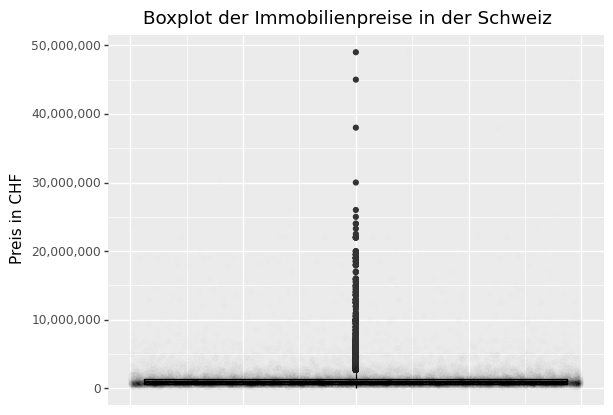

<ggplot: (706134584)>

In [7]:
(
    ggplot(df)
    + geom_boxplot(aes(x=1, y = 'price_cleaned'))
    + geom_jitter(aes(x=1, y = 'price_cleaned'), alpha = 0.005)
    + labs(title = 'Boxplot der Immobilienpreise in der Schweiz', x = '', y = 'Preis in CHF')
    + theme(axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank(), axis_title_x = element_blank())
    + scale_color_discrete(name = 'Immobilientyp')
    + scale_y_continuous(labels=lambda x: [f'{v:,.0f}' for v in x])
)

Erstellt man ein Boxplot der Preise über alle Datenpunkte, erkennt man sehr schnell, dass es sehr viele Ausreisser gibt. Diese Ausreisser schränken auch die Informationen ein die man aus dem Boxplot entnehmen kann. Dies kann man umgehen indem man die Y-Achse limitert und somit mehr Infos aus dem Boxplot entnehmen kann.

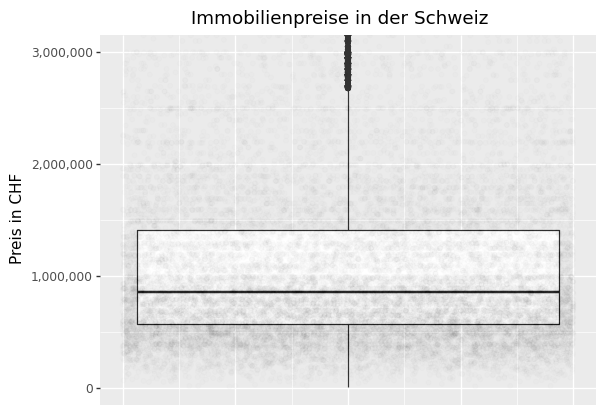

<ggplot: (706898996)>

In [8]:
(
    ggplot(df)
    + geom_boxplot(aes(x=1, y = 'price_cleaned'))
    + geom_jitter(aes(x=1, y = 'price_cleaned'), alpha = 0.009)
    + labs(title = 'Immobilienpreise in der Schweiz', x = '', y = 'Preis in CHF')
    + theme(axis_text_x = element_blank(), axis_ticks_major_x = element_blank(), axis_ticks_minor_x = element_blank(), axis_title_x = element_blank())
    + scale_color_discrete(name = 'Immobilientyp')
    + coord_cartesian(ylim = (0, 3_000_000))
    + scale_y_continuous(labels=lambda x: [f'{v:,.0f}' for v in x])
)

In [9]:
q1 = df['price_cleaned'].quantile(0.25)
q3 = df['price_cleaned'].quantile(0.75)
median = df['price_cleaned'].median()
average = df['price_cleaned'].mean()
upper_whisker = q3 + 1.5 * (q3 - q1)

print(f'Q1: {q1}', f'Q3: {q3}', f'Median: {median}', f'Average: {average}', f'Upper whisker: {upper_whisker}')

Q1: 575000.0 Q3: 1415000.0 Median: 860000.0 Average: 1302614.0010747663 Upper whisker: 2675000.0


Nach dem limitieren der Y-Achse und nach dem berechnen der Quantile und des Medians erkennt man
relativ gut, dass 50% der Daten sich zwischen 575’000.00 CHF und 1’415’000.00CHF befinden. Der
Median ist bei 860’000.00 CHF.

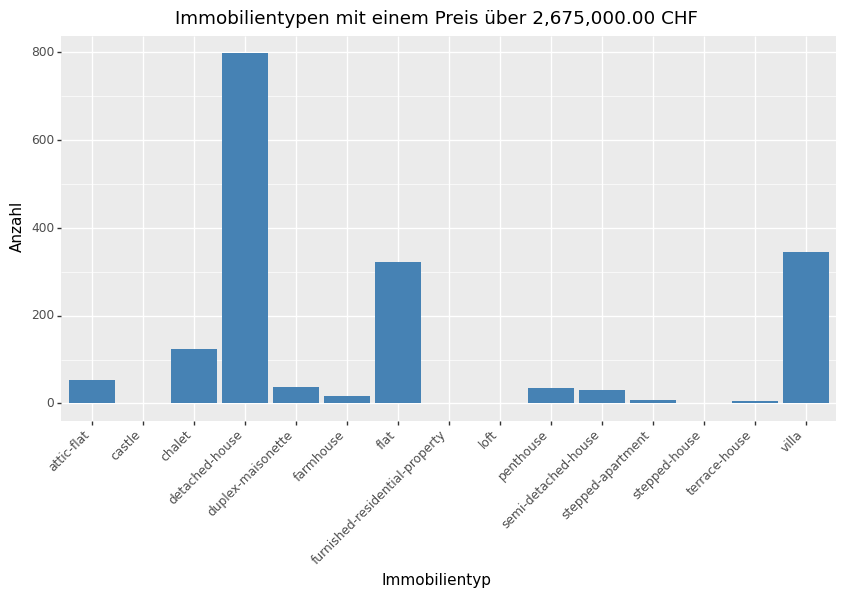

<ggplot: (706884443)>

In [10]:
df_outliers = df[df['price_cleaned'] > upper_whisker]
upper_whisker_f = f'{upper_whisker:,.2f}'

(
    ggplot(df_outliers)
    + geom_bar(aes(x = 'type'), fill = 'steelblue')
    + labs(title = f'Immobilientypen mit einem Preis über {upper_whisker_f} CHF', x = 'Immobilientyp', y = 'Anzahl')
    + theme(axis_text_x = element_text(angle = 45, hjust = 1), figure_size = (10, 5))
)

In [11]:
df_count_outliers = df_outliers.groupby('type').count()
df_count_outliers = df_count_outliers.reset_index()
df_count_outliers = df_count_outliers[['type', 'price_cleaned']]
df_count_outliers = df_count_outliers.rename(columns = {'price_cleaned': 'count'})
df_count_outliers

,type,count
0,attic-flat,53
1,castle,2
2,chalet,123
3,detached-house,796
4,duplex-maisonette,37
5,farmhouse,16
6,flat,321
7,furnished-residential-property,1
8,loft,1
9,penthouse,35


In diesem Plot sieht man was die Ausreisser für Immobilientypen haben. Die meisten Ausreisser sind vom typ "detached-house", mit ca. 800 Immobilien, gefolgt vom Typ "villa" mit ca. 350 Immobilien.

In [12]:
#make a list with those types who have more than 100 entries
df_types_count = df.groupby('type').count()
df_types_count = df_types_count.reset_index()
df_types_count = df_types_count[['type', 'price_cleaned']]
df_types_count = df_types_count.rename(columns = {'price_cleaned': 'count'})
types_over_100 = df_types_count[df_types_count['count'] > 100]["type"].unique()

#create a new dataframe with only those types
df_types = df[df['type'].isin(types_over_100)]
df_types.head()

,Living space,Plot area,price_cleaned,Floor,Latitude,Longitude,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,...,type_unified_studio,type_unified_terrace-house,type_unified_villa,NoisePollutionRailway,NoisePollutionRoad,PopulationDensity,RiversAndLakes,WorkplaceDensity,ForestDensity,type
0,100.0,1282.323307,1150000.0,4.00,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,0.0,0.0,0.0,0.076399,0.223039,0.031951,0.060414,0.296178,penthouse
1,156.0,222.000000,1420000.0,2.75,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,1.0,0.0,0.0,0.076399,0.223039,0.031951,0.060414,0.296178,terrace-house
2,93.0,1198.982216,720000.0,2.00,47.397416,8.043150,5000.0,0.909587,11.354420,32.197891,...,0.0,0.0,0.0,0.0,0.337930,0.451622,0.114168,0.167442,0.087050,penthouse
3,154.0,370.000000,1430000.0,0.00,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,0.0,0.0,0.0,0.0,0.076399,0.223039,0.031951,0.060414,0.296178,detached-house
4,142.0,462.537377,995000.0,0.00,47.404870,8.052781,5022.0,1.460245,33.137090,49.705635,...,0.0,0.0,0.0,0.0,0.167450,0.177506,0.114288,0.046822,0.252992,flat


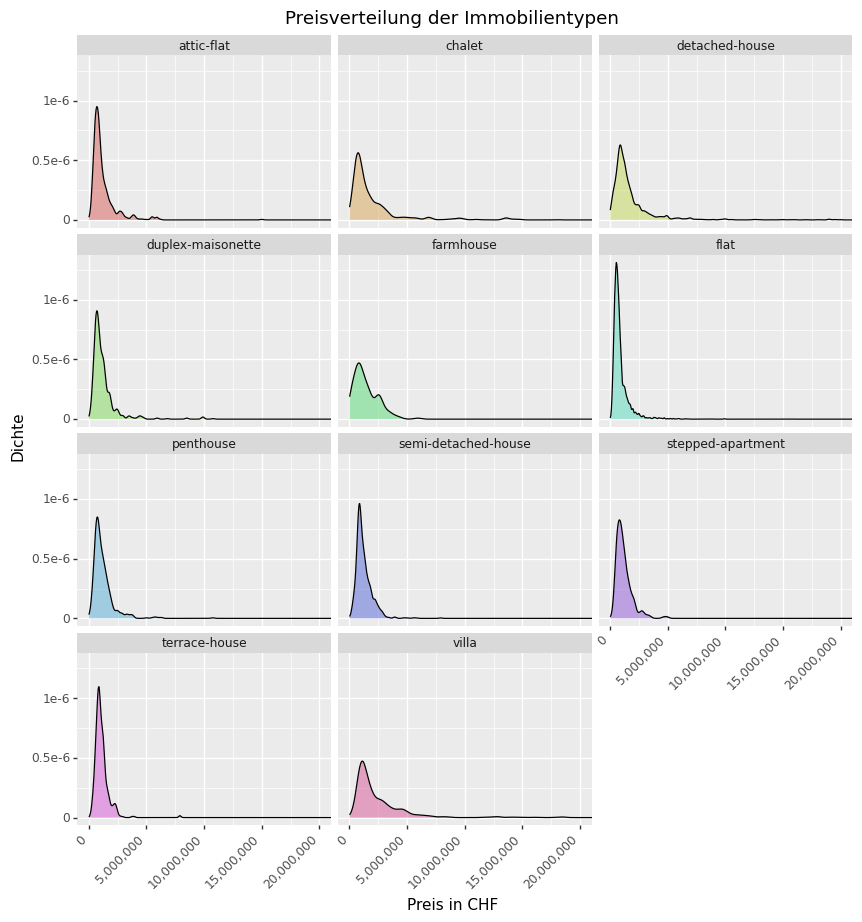

<ggplot: (707116195)>

In [13]:
#geom_density facet for every type
(
    ggplot(df_types)
    + geom_density(aes(x = 'price_cleaned', fill = 'type'), alpha = 0.5)
    + labs(title = 'Preisverteilung der Immobilientypen', x = 'Preis in CHF', y = 'Dichte')
    + theme(axis_text_x = element_text(angle = 45, hjust = 1), figure_size = (10, 10), legend_position = 'none', legend_box = 'vertical')
    + scale_x_continuous(labels=lambda x: [f'{v:,.0f}' for v in x])
    + facet_wrap('~ type', ncol = 3)
    + coord_cartesian(xlim = (0, 20_000_000))
    + scale_fill_discrete(name = 'Immobilientyp')
)

Anhand diesen Verteilungen kann man passende Transformationen rausfinden, die für Modelle dann
nützlich sein könnten.
Man w ̈urde zum Beispiel:
Linkschiefe verteilung: Log-Transformation oder Box-Cox-Transformation
Rechtsschiefe verteilung: Box-Cox-Transformation oder Ansatz mit Freiheitsgraden.

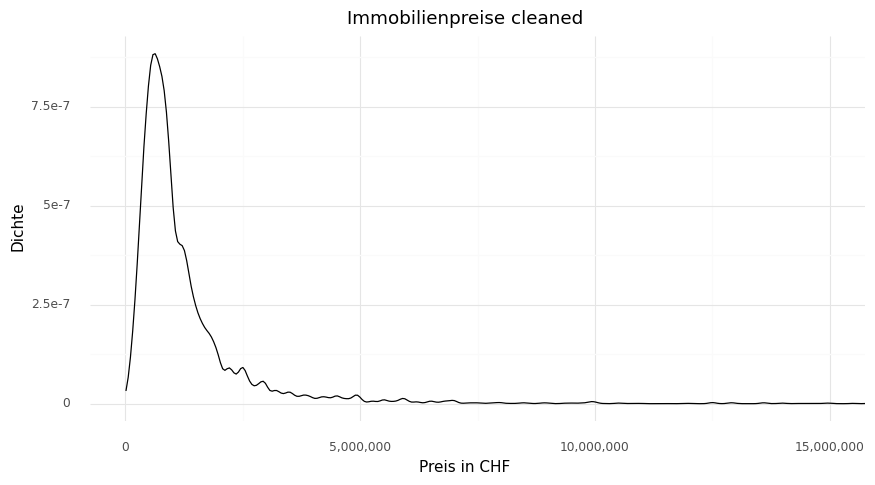

<ggplot: (707771651)>

In [14]:
(
ggplot(df, aes(x='price_cleaned')) 
+ geom_density() + theme_minimal() 
+ labs(title = 'Immobilienpreise cleaned', x = 'Preis in CHF', y = 'Dichte')
+ theme(figure_size=(10, 5))
+ scale_x_continuous(labels=lambda x: [f'{v:,.0f}' for v in x])
+ coord_cartesian(xlim = (0, 15_000_000))
)

Hier erkennt man, das die meisten Immobilien zwischen 0.00 - 2’500’000.00 CHF liegen, dies ist wichtig
zu sehen, da die Modelle in diesem Abschnitt die meisten Datenpunkte hat und somit diesen Bereich
am besten versteht.

### Korrelationsmatrix

In [15]:
#create df without "type" columns
df_without_types = df.drop(columns = [col for col in df.columns if 'type' in col])
df_without_types

,Living space,Plot area,price_cleaned,Floor,Latitude,Longitude,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,...,gde_workers_sector2,gde_workers_sector3,gde_workers_total,rooms,NoisePollutionRailway,NoisePollutionRoad,PopulationDensity,RiversAndLakes,WorkplaceDensity,ForestDensity
0,100.0,1282.323307,1150000.0,4.000000,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,9.0,308.0,331.0,5.0,0.000000,0.076399,0.223039,0.031951,0.060414,0.296178
1,156.0,222.000000,1420000.0,2.750000,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,9.0,308.0,331.0,5.0,0.000000,0.076399,0.223039,0.031951,0.060414,0.296178
2,93.0,1198.982216,720000.0,2.000000,47.397416,8.043150,5000.0,0.909587,11.354420,32.197891,...,3092.0,30364.0,33493.0,5.0,0.000000,0.337930,0.451622,0.114168,0.167442,0.087050
3,154.0,370.000000,1430000.0,0.000000,47.415927,8.085840,5023.0,3.038467,30.676329,51.449275,...,9.0,308.0,331.0,5.0,0.000000,0.076399,0.223039,0.031951,0.060414,0.296178
4,142.0,462.537377,995000.0,0.000000,47.404870,8.052781,5022.0,1.460245,33.137090,49.705635,...,349.0,941.0,1355.0,5.0,0.000000,0.167450,0.177506,0.114288,0.046822,0.252992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,102.0,140.000000,475000.0,0.000000,47.158311,9.468139,9470.0,1.375319,37.178683,29.028213,...,1695.0,5769.0,7565.0,4.5,0.000000,0.324880,0.174797,0.000000,0.054621,0.326293
22477,250.0,575.342751,1490000.0,0.491208,47.467888,9.052650,9500.0,1.067011,57.602820,30.599295,...,2640.0,1902.0,4942.0,5.5,0.000000,0.394630,0.415555,0.004666,0.268897,0.000000
22478,240.0,455.000000,1450000.0,0.000000,47.463605,9.038485,9500.0,0.230859,57.602820,30.599295,...,2640.0,1902.0,4942.0,5.5,0.054650,0.289442,0.386169,0.000000,0.363505,0.000000
22479,175.0,677.771516,1290000.0,0.598259,47.526024,8.926627,9548.0,0.357339,57.068742,26.718547,...,474.0,523.0,1063.0,5.5,0.000000,0.257977,0.163638,0.016037,0.074210,0.200186


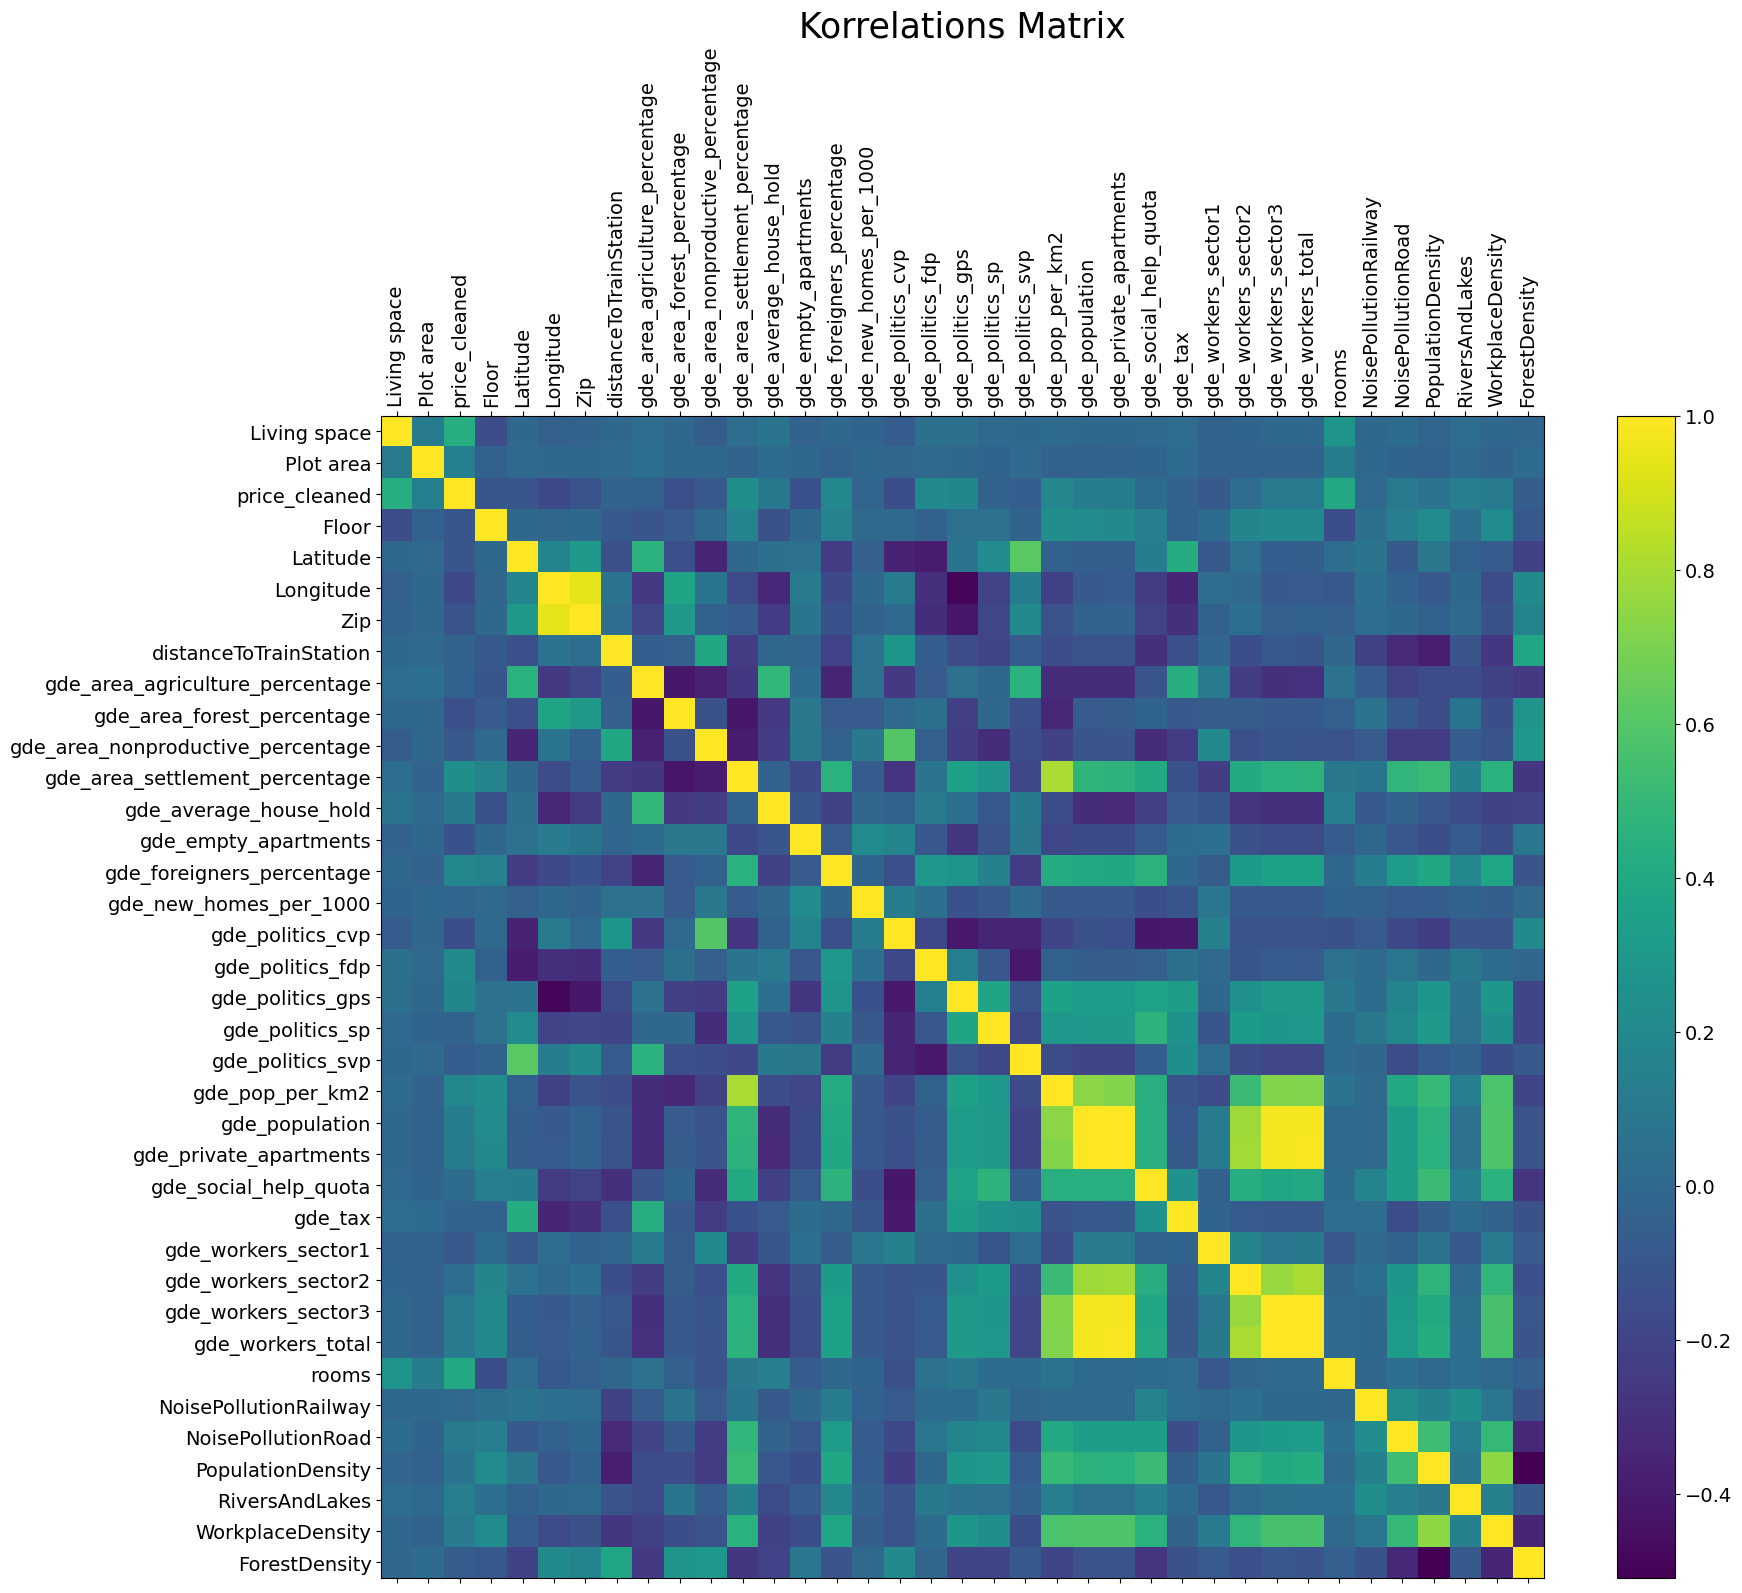

In [16]:
#plot correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(df_without_types.corr(), fignum=f.number)
plt.xticks(range(df_without_types.select_dtypes(['number']).shape[1]), df_without_types.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_without_types.select_dtypes(['number']).shape[1]), df_without_types.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Korrelations Matrix', fontsize=25)
plt.show()

In [17]:
#all correlations which are over 0.7 or under -0.7
corr = df_without_types.corr()
corr_high = corr.where((corr > 0.7) | (corr < -0.7)).stack()
corr_high = corr_high[~(corr_high.index.get_level_values(0) == corr_high.index.get_level_values(1))]
corr_high = corr_high.reset_index()
corr_high = corr_high.rename(columns = {'level_0': 'feature_1', 'level_1': 'feature_2', 0: 'correlation'})
corr_high["comb"] = corr_high.apply(lambda x: "".join(sorted([x["feature_1"], x["feature_2"]])), axis=1)
corr_high = corr_high.drop_duplicates(subset=["comb"])
corr_high = corr_high.drop(columns = ["comb"])
corr_high

,feature_1,feature_2,correlation
0,Longitude,Zip,0.942479
2,gde_area_settlement_percentage,gde_pop_per_km2,0.807487
4,gde_pop_per_km2,gde_population,0.739096
5,gde_pop_per_km2,gde_private_apartments,0.722114
6,gde_pop_per_km2,gde_workers_sector3,0.718678
7,gde_pop_per_km2,gde_workers_total,0.712991
9,gde_population,gde_private_apartments,0.998609
10,gde_population,gde_workers_sector2,0.787208
11,gde_population,gde_workers_sector3,0.979864
12,gde_population,gde_workers_total,0.981372


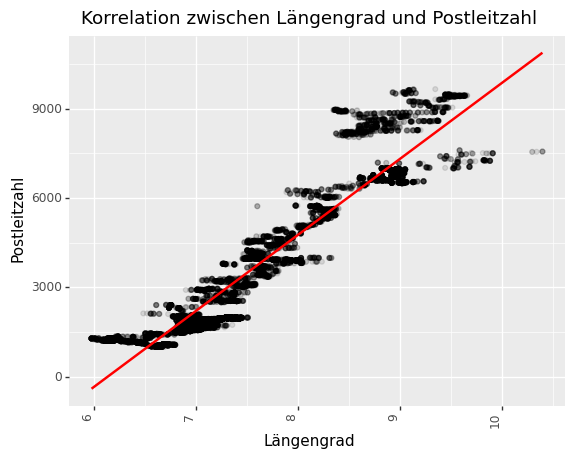

<ggplot: (706820928)>

In [18]:
#scatter_long_zip --> 0.942479
(
    ggplot(df)
    + geom_point(aes(x='Longitude', y = 'Zip'), alpha = 0.1)
    + geom_smooth(aes(x='Longitude', y = 'Zip'), method = 'lm', se = False, color = 'red')
    + labs(title = 'Korrelation zwischen Längengrad und Postleitzahl', x = 'Längengrad', y = 'Postleitzahl')
    + theme(axis_text_x = element_text(angle = 90, hjust = 1))
)

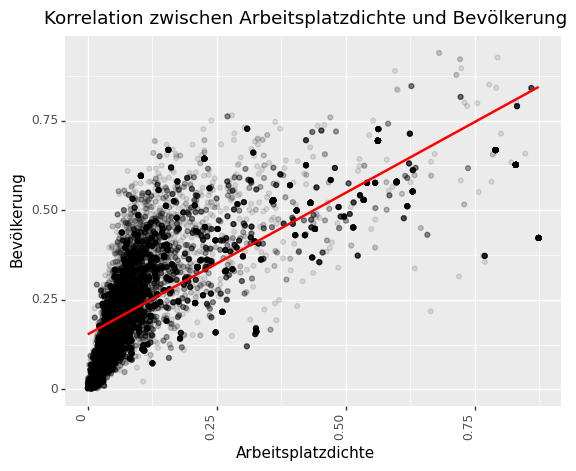

<ggplot: (706890374)>

In [19]:
#scatter_workdensity_population --> 0.741282
(
    ggplot(df)
    + geom_point(aes(x='WorkplaceDensity', y = 'PopulationDensity'), alpha = 0.1)
    + geom_smooth(aes(x='WorkplaceDensity', y = 'PopulationDensity'), method = 'lm', se = False, color = 'red')
    + labs(title = 'Korrelation zwischen Arbeitsplatzdichte und Bevölkerung', x = 'Arbeitsplatzdichte', y = 'Bevölkerung')
    + theme(axis_text_x = element_text(angle = 90, hjust = 1))
)

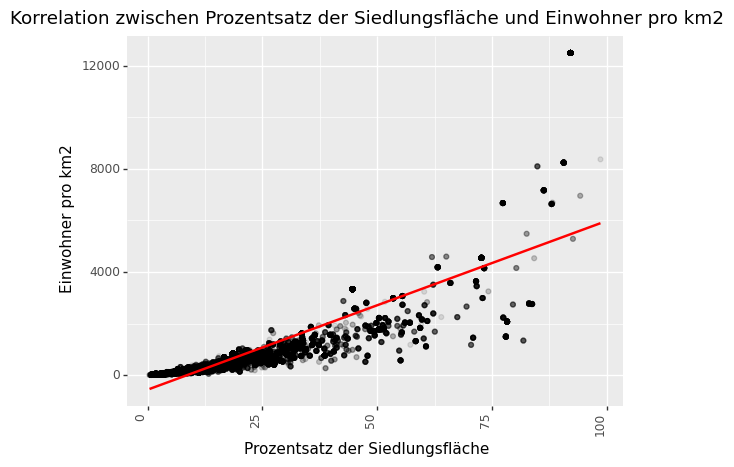

<ggplot: (736846488)>

In [20]:
#scatter_settlement_pop --> 0.807487
(
    ggplot(df)
    + geom_point(aes(x='gde_area_settlement_percentage', y = 'gde_pop_per_km2'), alpha = 0.1)
    + geom_smooth(aes(x='gde_area_settlement_percentage', y = 'gde_pop_per_km2'), method = 'lm', se = False, color = 'red')
    + labs(title = 'Korrelation zwischen Prozentsatz der Siedlungsfläche und Einwohner pro km2', x = 'Prozentsatz der Siedlungsfläche', y = 'Einwohner pro km2')
    + theme(axis_text_x = element_text(angle = 90, hjust = 1))
)